# Assignment04-02

## Salary_hike -> Build a prediction model for Salary_hike

------------------------------------------------------------

## Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.preprocessing import scale
from numpy import set_printoptions

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Datasets/Linear Regression/Salary_Data.csv')

In [ ]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


### EDA and Data Visualization

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


#### there is no Null values in dataset

#### let's find out outlier with the help of boxplot

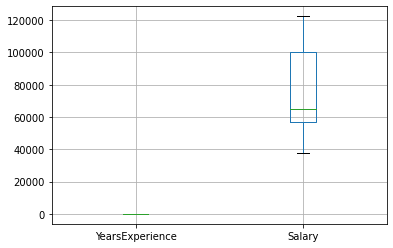

In [ ]:
df.boxplot()

#### There is no outliers in our dataset

In [ ]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [ ]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


#### Corr - 0.978 is defines a strong relation bet^n Dellivery time and Sorting time so, we can build the model.

#### Standardize the data

In [ ]:
array=df.values
norm=scale(array)
norm

array([[-1.51005294, -1.36011263],
       [-1.43837321, -1.10552744],
       [-1.36669348, -1.419919  ],
       [-1.18749416, -1.20495739],
       [-1.11581443, -1.33978143],
       [-0.86493538, -0.71830716],
       [-0.82909552, -0.58815781],
       [-0.75741579, -0.79981746],
       [-0.75741579, -0.42881019],
       [-0.57821647, -0.69801306],
       [-0.50653674, -0.47433279],
       [-0.47069688, -0.74976858],
       [-0.47069688, -0.70662043],
       [-0.43485702, -0.70201994],
       [-0.29149756, -0.55250402],
       [-0.1481381 , -0.29921736],
       [-0.07645838, -0.37004264],
       [-0.00477865,  0.26285865],
       [ 0.21026054,  0.19885989],
       [ 0.2461004 ,  0.66547573],
       [ 0.53281931,  0.58377993],
       [ 0.6403389 ,  0.82623317],
       [ 0.92705781,  0.93861127],
       [ 1.03457741,  1.40274136],
       [ 1.21377673,  1.24020308],
       [ 1.32129632,  1.09740238],
       [ 1.50049564,  1.51986835],
       [ 1.5363355 ,  1.3590738 ],
       [ 1.78721455,

In [ ]:
df.rename(columns = {'YearsExperience': 'Exp'}, inplace = True)

In [ ]:
import statsmodels.formula.api as smf

## Model1

In [ ]:
model1=smf.ols('Salary~Exp',data=df).fit()
model1.params

Intercept    25792.200199
Exp           9449.962321
dtype: float64

In [ ]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Fri, 14 Jan 2022   Prob (F-statistic):           1.14e-20
Time:                        14:25:53   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
Exp         9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
pred=model1.predict(df.iloc[:,0]) #model.predict(df['YearsExperience'])
pred
model1.resid
model1.resid_pearson

array([ 0.54520896,  1.40418217, -0.38632031, -0.20163464, -1.15596979,
        0.59514885,  1.03793812, -0.27418681,  1.45343166, -0.61642477,
        0.09863781, -1.34720543, -1.1462834 , -1.28812023, -1.24492716,
       -0.71851921, -1.37484017,  1.24578559, -0.03178436,  1.9777821 ,
        0.29128615,  0.93050694,  0.14772822,  1.81920104,  0.24603492,
       -0.90870332,  0.24223936, -0.66976978, -0.12712026, -0.54330225])

In [ ]:
rmse_lin=np.sqrt(np.mean((np.array(df['Salary'])-np.array(pred))**2))
rmse_lin

5592.043608760662

In [ ]:
#R squared values
R1=(model1.rsquared,model1.rsquared_adj)
R1

(0.9569566641435086, 0.9554194021486339)

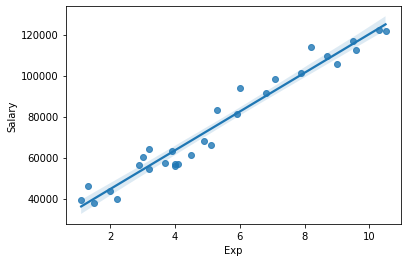

In [ ]:
 sns.regplot(x='Exp',y='Salary',data=df)

In [ ]:
# Prediction of salary using for 8 years Exp.

newdata=pd.Series([8])
data_pred=pd.DataFrame(newdata,columns=['Exp'])
model1.predict(data_pred)

0    101391.89877
dtype: float64

## Model2

In [ ]:
model2=smf.ols('Salary~np.log(Exp)',data=df).fit()
model2.params
model2.resid
model2.resid_pearson

array([ 1.92668535,  1.9344319 ,  0.59528747,  0.04385928, -0.65958399,
       -0.14009554,  0.05983938, -0.72070308,  0.21698667, -1.01586668,
       -0.65086038, -1.4433439 , -1.33429059, -1.41662681, -1.39297775,
       -1.07687064, -1.40810917,  0.04511883, -0.52473744,  0.5906383 ,
       -0.09212822,  0.35636761,  0.23410631,  1.26532617,  0.62929102,
        0.1393676 ,  1.00137122,  0.55512972,  1.20211758,  1.08026978])

In [ ]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Fri, 14 Jan 2022   Prob (F-statistic):           3.25e-13
Time:                        14:35:59   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(Exp)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
pred1=model2.predict(df.iloc[:,0])
pred1

0      18795.848339
1      25575.235192
2      31382.551905
3      43057.262306
4      46925.138875
5      58136.050079
6      59511.842441
7      62130.943929
8      62130.943929
9      68022.718504
10     70159.105863
11     71186.552842
12     71186.552842
13     72188.628149
14     75966.422577
15     79422.295729
16     81045.791737
17     82606.829882
18     86959.066704
19     87641.132977
20     92720.502137
21     94472.514696
22     98805.371390
23    100317.918684
24    102719.920751
25    104095.713112
26    106289.868435
27    106714.814600
28    109571.007247
29    110351.454145
dtype: float64

In [ ]:
rmse_log=np.sqrt(np.mean((np.array(df['Salary'])-np.array(pred1))**2))
rmse_log

10302.893706228306

In [ ]:
#R squared values
R2=(model2.rsquared,model2.rsquared_adj)
R2

(0.8538888828756969, 0.8486706286926861)

In [ ]:
# Prediction of salary using random exp.

newdata=pd.Series([13.8,10,15])
data_pred=pd.DataFrame(newdata,columns=['Exp'])
model2.predict(data_pred)

0    121442.240976
1    108371.452290
2    124826.032426
dtype: float64

## Model3

In [ ]:
model3=smf.ols('np.log(Salary)~Exp',data=df).fit()
model3.params

Intercept    10.507402
Exp           0.125453
dtype: float64

In [ ]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Fri, 14 Jan 2022   Prob (F-statistic):           7.03e-18
Time:                        14:41:23   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.5074      0.038    273.327      0.000      10.429      10.586
Exp            0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
pred2=model3.predict(df.iloc[:,0])

In [ ]:
rmse_exp=np.sqrt(np.mean((np.array(df['Salary'])-np.array(pred2))**2))
rmse_exp

80630.25750602805

In [ ]:
#R squared values
R3=(model3.rsquared,model3.rsquared_adj)
R3

(0.9319671194084197, 0.9295373736730062)

In [ ]:
R1

(0.9569566641435086, 0.9554194021486339)

In [ ]:
R2

(0.8538888828756969, 0.8486706286926861)

In [ ]:
R3

(0.9319671194084197, 0.9295373736730062)

#### After compairing all tis 3 Rsquare values of 3 different models we can conclude that R1 which is belongs to model1 is a better model than others.

### model1 is Better than others